<a href="https://colab.research.google.com/github/TheReatBe/DataScience/blob/main/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <strong>Torch library</strong>


In [ ]:
import torch

w = torch.tensor( [[1.,2.],[4.,5.]], requires_grad=True)

function = 10 * torch.log( ( w + 1. ) ).sum()

function.backward()

print(w-w.grad)
#f=lambda x: x-10/(x+1)



tensor([[-4.0000, -1.3333],
        [ 2.0000,  3.3333]], grad_fn=<SubBackward0>)


In [ ]:
import numpy as np
x0 = np.array([[1,2], [4,5]])
x1 = x0 - 10/(x0 + 1)
print (x1)

[[-4.         -1.33333333]
 [ 2.          3.33333333]]


# Gradient descent

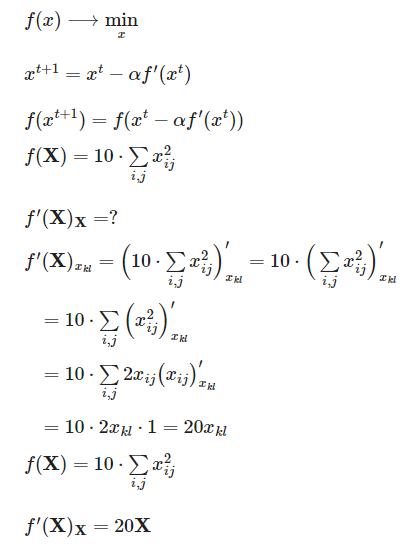

In [ ]:
import torch

x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

#######
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
x = x.to(device)
#######

function = 10 * (x ** 2).sum()

function.backward() #-> это производная

print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


In [ ]:
import torch

w = torch.tensor([[5, 10], [1, 2]], requires_grad=True, dtype=torch.float) # добавить тип переменных

function = torch.log(torch.log(w +7)).prod() 
function.backward()
print(w.grad) # Код для самопроверки

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])


In [ ]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    # critical: calculate the function inside the loop
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -= alpha * w.grad# put code here
    w.grad.zero_() # something is missing

print(w) # Код для самопроверки, не забудьте закомментировать перед

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


 **Используем optimizer**

In [ ]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001
optimizer =  torch.optim.SGD([w], alpha)# put our code here. Do not forget [] inside SGD constructor !!!!

for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()# something is missing here!

print(w) # Код для самопроверки

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


# First neural network

In [ ]:
import torch
tmp = torch.Tensor([1., 2., 3.])
print(tmp.shape)                       # Исходная размерность
print(tmp.unsqueeze_(1).shape)         # Размерность после применения unsqueeze_

torch.Size([3])
torch.Size([3, 1])


0.02019159495830536


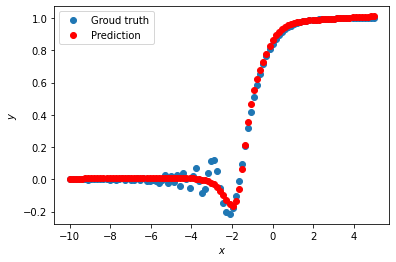

In [ ]:
import torch
import matplotlib.pyplot as plt

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(10)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
   return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


predict(net, x_validation, y_validation)
plt.show()

# Sin Prediction

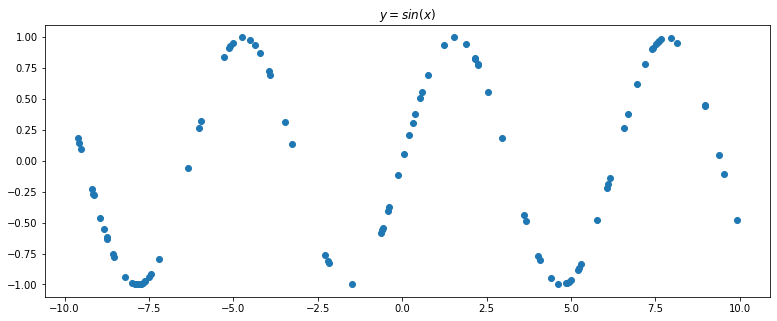

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

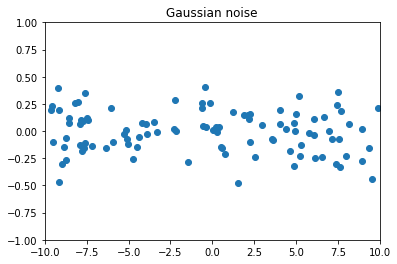

In [ ]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

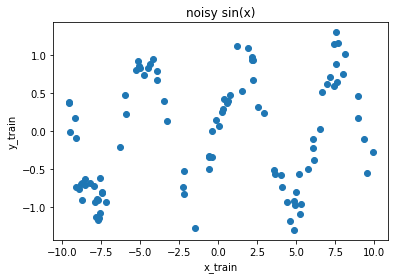

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

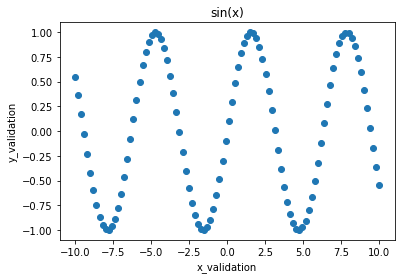

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

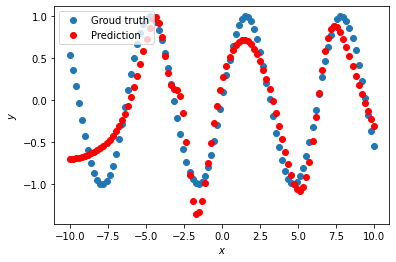

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(5)
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()

predict(sine_net, x_validation, y_validation)

# Wine Prediction

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

import sklearn.datasets
wine = sklearn.datasets.load_wine()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        #self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        #self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        #x = self.fc2(x)
        #x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(5)

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(), 
                             lr=1.0e-3)

In [ ]:
batch_size = 10

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.5000)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.5370)
tensor(0.5370)
tensor(0.7222)
tensor(0.7222)
tensor(0.7593)
tensor(0.7963)
tensor(0.7778)
tensor(0.7778)
tensor(0.7778)
tensor(0.7963)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8704)
tensor(0.8519)
tensor(0.8704)
tensor(0.8704)
tensor(0.8889)
tensor(0.8704)
tensor(0.9074)
tensor(0.8889)
tensor(0.9074)
tensor(0.9074)
tensor(0.9074)


KeyboardInterrupt: ignored

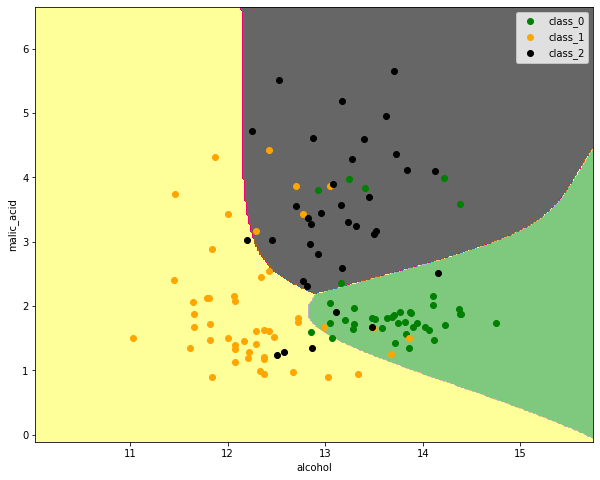

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# Multi network

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)


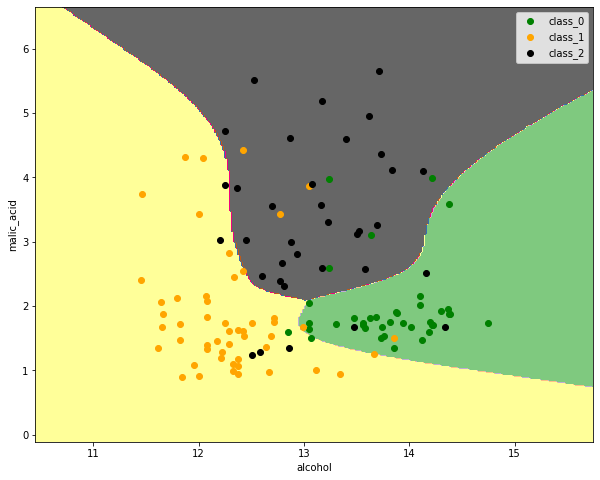

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn.model_selection import train_test_split
import torch
import random
import numpy as np

wine = sklearn.datasets.load_wine()
wine.data.shape

# ------Dataset preparation start--------:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
# ------Dataset preparation end--------:

class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(5)

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(), 
                             lr=1.0e-3)

batch_size = 10

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# MNIST

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

X_train = X_train.float()
X_test = X_test.float()
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
# list(mnist_net.parameters())

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()      
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] .to(device)
        y_batch = y_train[batch_indexes] .to(device)       
        preds = mnist_net.forward(X_batch)        
        loss_value = loss(preds, y_batch)
        loss_value.backward()     
        optimizer.step()

    test_pred = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_pred, y_test))
    
    accuracy = (test_pred.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9287)
tensor(0.9250)
tensor(0.9274)
tensor(0.9307)
tensor(0.9338)
tensor(0.9352)
tensor(0.9309)
tensor(0.9344)
tensor(0.9344)
tensor(0.9381)
tensor(0.9409)
tensor(0.9373)
tensor(0.9346)
tensor(0.9383)
tensor(0.9347)
tensor(0.9385)
tensor(0.9389)
tensor(0.9441)
tensor(0.9416)
tensor(0.9417)
tensor(0.9439)
tensor(0.9436)


KeyboardInterrupt: ignored

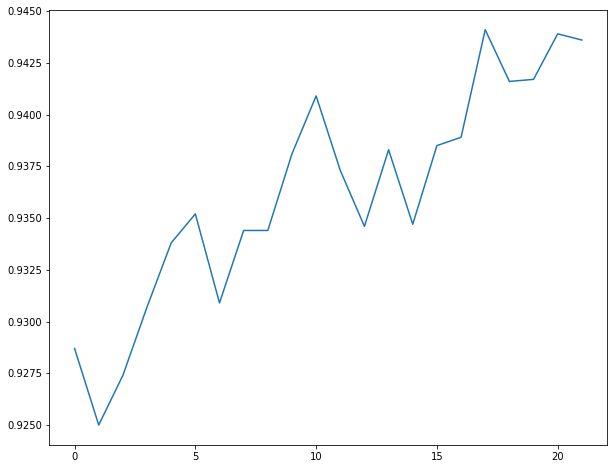

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_accuracy_history)
#plt.plot(test_loss_history)

In [ ]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)

# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
fc_out_alternative =  torch.mm(x, w.t()) + b

# Проверка осуществляется автоматически вызовом функции
print(fc_out)
print(fc_out_alternative)
# (раскомментируйте, если решаете задачу локально)

tensor([[381., 682., 983.]], grad_fn=<AddmmBackward0>)
tensor([[381., 682., 983.]])


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


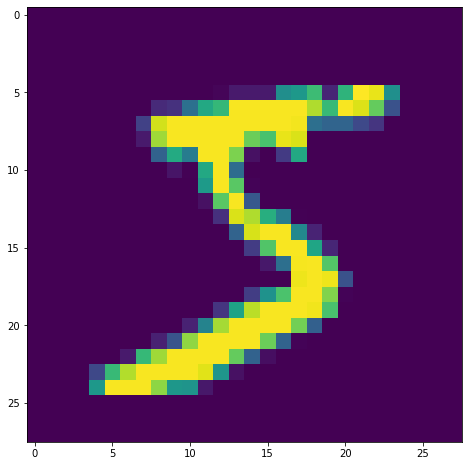

tensor(5)


In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

X_train = X_train.float()
X_test = X_test.float()

import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

# Convolutional networks

In [ ]:
import torch
from torch import nn

x = torch.ones(1,2,4,5)
conv = nn.Conv2d(2, 8, kernel_size=3, stride=2, padding=1, bias=False)
res = conv(x)
res.view(-1).shape

torch.Size([48])

In [ ]:
import torch
from torch import nn

conv = nn.Conv2d(1,1,kernel_size=3, padding=1, stride=2, bias=False)
X = torch.FloatTensor([[[

    [4, 2, -1],

    [-6, 0, 5],

    [3, 2, 2]]]])

conv.weight.data = torch.FloatTensor([[[

    [0, 1, 2],

    [1, -1, 0],

    [1, 0, -2]]]])

res = conv(X).data[0,0]
print(res)

In [ ]:
import torch

# Создаем входной массив из двух изображений RGB 3*3
input_images = torch.tensor(
      [[[[0,  1,  2],
         [3,  4,  5],
         [6,  7,  8]],

        [[9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]]])


def get_padding2d(input_images):
    padded_images = torch.nn.functional.pad(input = input_images.float(), pad=(1, 1, 1, 1), mode="constant", value=0)
    # добавить нулей с четырех сторон каждого изображения
    return padded_images


correct_padded_images = torch.tensor(
       [[[[0.,  0.,  0.,  0.,  0.],
          [0.,  0.,  1.,  2.,  0.],
          [0.,  3.,  4.,  5.,  0.],
          [0.,  6.,  7.,  8.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0.,  9., 10., 11.,  0.],
          [0., 12., 13., 14.,  0.],
          [0., 15., 16., 17.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 18., 19., 20.,  0.],
          [0., 21., 22., 23.,  0.],
          [0., 24., 25., 26.,  0.],
          [0.,  0.,  0.,  0.,  0.]]],


        [[[0.,  0.,  0.,  0.,  0.],
          [0., 27., 28., 29.,  0.],
          [0., 30., 31., 32.,  0.],
          [0., 33., 34., 35.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 36., 37., 38.,  0.],
          [0., 39., 40., 41.,  0.],
          [0., 42., 43., 44.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 45., 46., 47.,  0.],
          [0., 48., 49., 50.,  0.],
          [0., 51., 52., 53.,  0.],
          [0.,  0.,  0.,  0.,  0.]]]])

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
print(torch.allclose(get_padding2d(input_images), correct_padded_images))

True


In [ ]:
import torch
from abc import ABC, abstractmethod


# абстрактный класс для сверточного слоя
class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

   def set_kernel(self, kernel):
        self.kernel = kernel

   @abstractmethod
    def __call__(self, input_tensor):
        pass


# класс-обертка над torch.nn.Conv2d для унификации интерфейса
class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

   def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

   def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


# функция, создающая объект класса cls и возвращающая свертку от input_matrix
def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

   layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

   return layer(input_matrix)


# Функция, тестирующая класс conv2d_cls.
# Возвращает True, если свертка совпадает со сверткой с помощью torch.nn.Conv2d.
def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

   in_channels = kernel.shape[1]

   input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

   custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

   return torch.allclose(custom_conv2d_out, conv2d_out) \

              and (custom_conv2d_out.shape == conv2d_out.shape)

print(test_conv2d_layer(Conv2d))

In [ ]:
#Очень ленивый, пускай работает железный паровоз.
import torch
conv = torch.nn.Conv2d(1,1,kernel_size=2, padding=0, stride= 2, bias=False)
x = torch.ones(1, 1, 10, 10)
conv.weight.data = torch.ones(1, 1, 2, 2)
print(conv(x).data[0,0].shape)

torch.Size([5, 5])


In [ ]:
import torch
X = torch.randn(16, 5, 5)
assert X.shape == (16, 5, 5)
assert X.flatten().shape == torch.flatten(X).shape == (400,)

In [ ]:
import torch

N = 4
C = 3
C_out = 10
H = 8
W = 16

x = torch.ones((N, C, H, W))

def padding_calc(input_matrix_shape, out_matrix_shape, kernel_size, stride):
  padding_h = (stride * (out_matrix_shape[0] - 1) - input_matrix_shape[0] + kernel_size[0]) / 2
  padding_w = (stride * (out_matrix_shape[1] - 1) - input_matrix_shape[1] + kernel_size[1]) / 2
  padding_size = [padding_h, padding_w]
  return padding_size

y = padding_calc((8, 16), (8, 16), (3, 5), 1)
print (y)


[1.0, 2.0]


# Stepik ML contest

**events_train.csv** - данные о действиях, которые совершают студенты со стэпами

> 
1.   ***step_id*** - id стэпа 
2.   ***user_id*** - анонимизированный id юзера
3.   ***timestamp*** - время наступления события в формате unix date
4.   ***action*** - событие, возможные значения: 
>discovered - пользователь перешел на стэп 
  viewed - просмотр шага; 
  started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага;
  passed - удачное решение практического шага

**submissions_train.csv** - данные о времени и статусах сабмитов к практическим заданиям

> 
1.   ***step_id*** - id стэпа 
2.   ***timestamp*** - время наступления события в формате unix date
3.   ***submission_status*** - статус решения
4.   ***user_id*** - анонимизированный id юзера 


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [ ]:
events_data.action.unique()
#'viewed' - посмотреть, 'passed' - решить, 'discovered' - впервые увидеть, 'started_attempt' - начать решать

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [ ]:
#переводим в привычный формат времени
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [ ]:
print(events_data.dtypes)
#дата старта прохождения курса
print(events_data.date.min())
#дата последнего прохождения курса
print(events_data.date.max())

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object
2015-06-15 04:00:48
2018-05-19 23:33:31


In [ ]:
#выделяем столбец день
events_data['day'] = events_data.date.dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
#сколько человек и в какой день записалось
user_day = events_data.groupby('day').user_id.nunique()
user_day.head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [ ]:
# Надстройка для изменения размера графика
sns.set(rc={'figure.figsize': (9,6)}) 

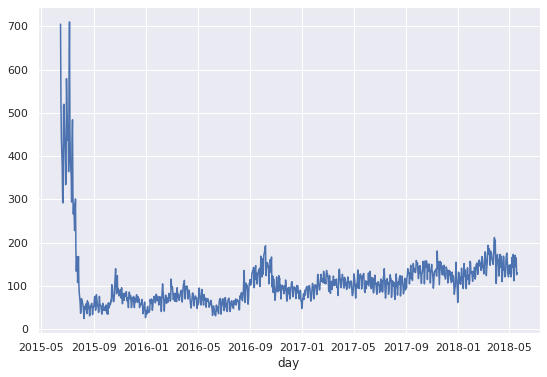

In [ ]:
user_day.plot()

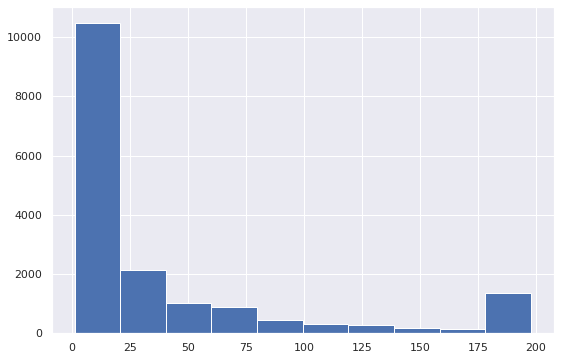

In [ ]:
#распределение пользователей по количеству баллов
users_passed_step = events_data[events_data.action == 'passed'] \
                    .groupby('user_id', as_index = False) \
                    .agg({'step_id': 'count'}) \
                    .rename(columns = {'step_id': 'passed_step'})
users_passed_step.passed_step.hist()

In [ ]:
#миним. кол-во баллов, пройденное пользователем
users_passed_step.passed_step.min()

1

In [ ]:
events_data.pivot_table(index='user_id', #в результате каждая строчка будет информацией о каждом уникальном index
               columns='action', #столбцы будут отвеать за уникальные значения columns 
                        columns='action', #в ячейках будет находиться информация по values
                        values='step_id', 
                        aggfunc='count', #сгруппированная по aggfunc
                        fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


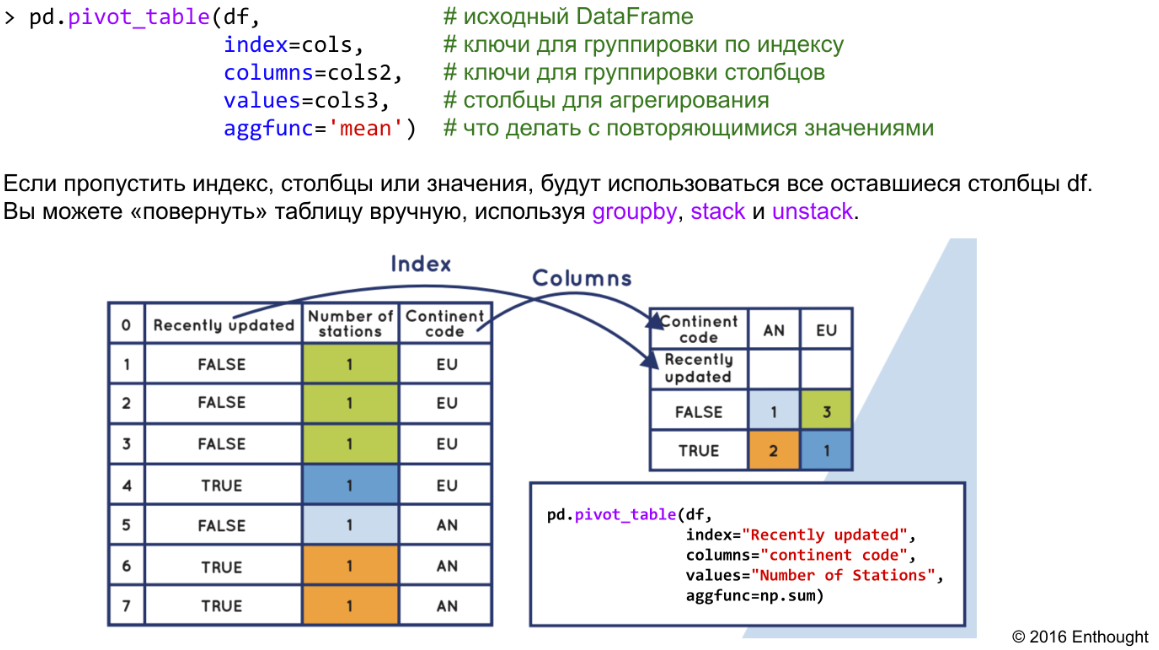![image.png]()

In [ ]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [ ]:
#изменяем формат времени + столбец "день"
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
users_scores = submissions_data.pivot_table(index='user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


Определение бросивших курс посредством анализа промежутка времени

In [ ]:
events_data[['user_id', 'day', 'timestamp']].head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
1,17632,2015-06-15,1434340848
2,17632,2015-06-15,1434340848
3,17632,2015-06-15,1434340895
4,17632,2015-06-15,1434340895


In [ ]:
# Удаляем дубликаты только по айди и дням
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [ ]:
# Для каждого пользователя находим уникальные таймстемпы
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
                                            .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [ ]:
# Для каждого пользователя находим разницу по времени между степами
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
.groupby('user_id')['timestamp'].apply(list) \
.apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

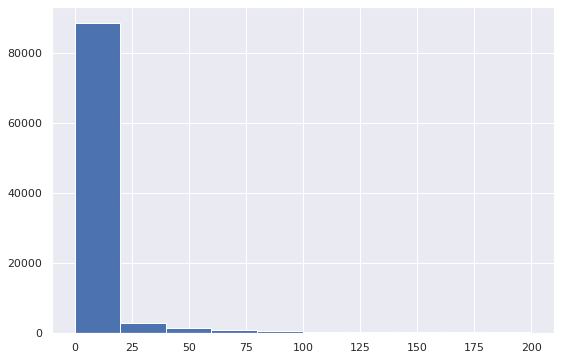

In [ ]:
# Для каждого пользователя находим разницу по времени между степами
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
.groupby('user_id')['timestamp'].apply(list) \
.apply(np.diff).values

gap_data = pd.Series(np.hstack(gap_data))
gap_data = gap_data / (24 * 60 * 60)
gap_data[gap_data < 200].hist()

In [ ]:
gap_data.quantile(0.90) #90% пользователей возвращается спустя 18 дней, 10% более чем через 18 дней

18.325995370370403

In [ ]:
#ищем Анатолия Карпова
events_data[['user_id', 'timestamp']].groupby('user_id').nunique('timestamp').sort_values(by='timestamp', ascending=False)

,timestamp
user_id,
20907,32764
10794,16089
25279,9777
1046,8834
3572,7245
...,...
6290,1
6292,1
6295,1


In [ ]:
submissions_data[['user_id', 'timestamp']].groupby('user_id').nunique('timestamp').sort_values(by='timestamp', ascending=False)

,timestamp
user_id,
12265,1051
3643,948
1046,934
14454,920
643,888
...,...
10652,1
10505,1
10502,1


In [ ]:
users_data = events_data.groupby('user_id', as_index=False) \
                        .agg({'timestamp': 'max'})\
                        .rename(columns={'timestamp': 'last_timestamp'})

now = 1526772811 #2018-05-19
drop_out_treshold = 30 * 24 * 60 * 60 # максимальный таймстемп за месяц
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshold
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [ ]:
#ставим "внешнее" пересечение
users_data = users_data.merge(users_scores, on='user_id', how='outer')
users_data.head()
users_data = users_data.fillna(0)
users_data.head()

,user_id,last_timestamp,is_gone_user,correct_x,wrong_x,correct_y,wrong_y,correct,wrong
0,1,1472827464,True,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1519226966,True,2.0,0.0,2.0,0.0,2.0,0.0
2,3,1444581588,True,29.0,23.0,29.0,23.0,29.0,23.0
3,5,1499859939,True,2.0,2.0,2.0,2.0,2.0,2.0
4,7,1521634660,True,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_events_data = events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [ ]:
users_data = users_data.merge(users_events_data, on='user_id', how='outer')
users_data.head()

,user_id,last_timestamp,is_gone_user,correct_x,wrong_x,correct_y,wrong_y,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,2.0,0.0,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,29.0,23.0,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,2.0,2.0,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1


In [ ]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [ ]:
users_data = users_data.merge(users_days, on='user_id', how='outer')
users_data.head()

,user_id,last_timestamp,is_gone_user,correct_x,wrong_x,correct_y,wrong_y,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,2.0,0.0,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,29.0,23.0,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,2.0,2.0,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,1


In [ ]:
#Проверяем не потеряли ли кого-нибудь?
print(users_data.user_id.nunique())
print(events_data.user_id.nunique())

19234
19234


In [ ]:
#Сколько человек прошло курс?
users_data['passed_course'] = users_data.passed > 170
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct_x,wrong_x,correct_y,wrong_y,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [ ]:
# 100*1425/17809 - доля прошедших курс
users_data['passed_course'].value_counts(normalize=True)*100 # второй способ

False    92.591245
True      7.408755
Name: passed_course, dtype: float64

# Decision trees